# 20240915
초안
1. wf xy좌표 사용. 
2. ★ shot grid 수정해야함.  그냥 단순히 step pitch로 쪼개놓은것임. wafer정센터 0,0 기준으로 grid그려야함

# 20240915 LOT_ID별 
lot id 개별로 그리는 기능은 추가함.




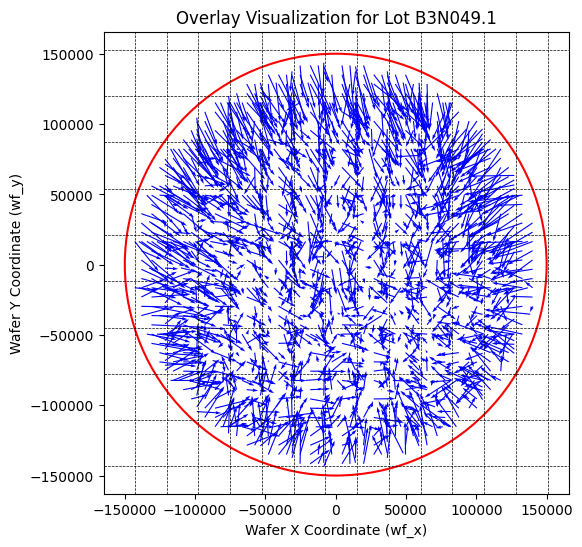

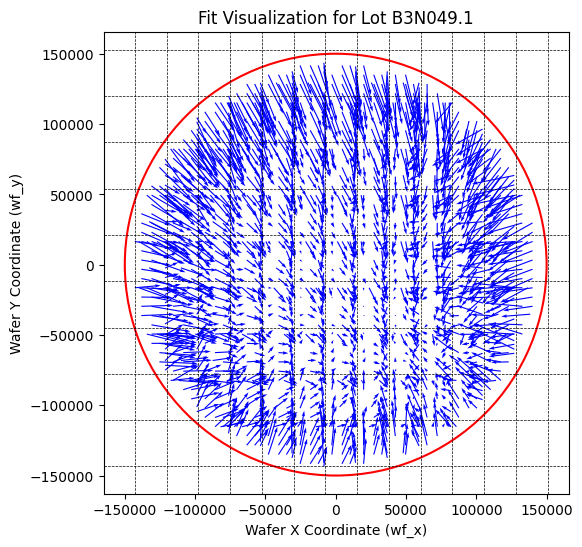

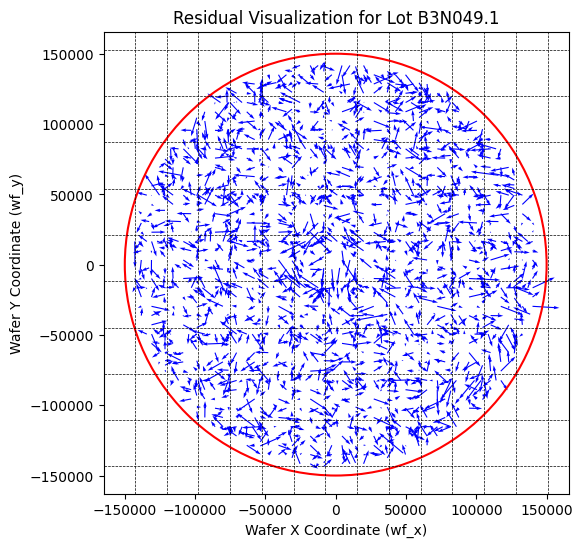

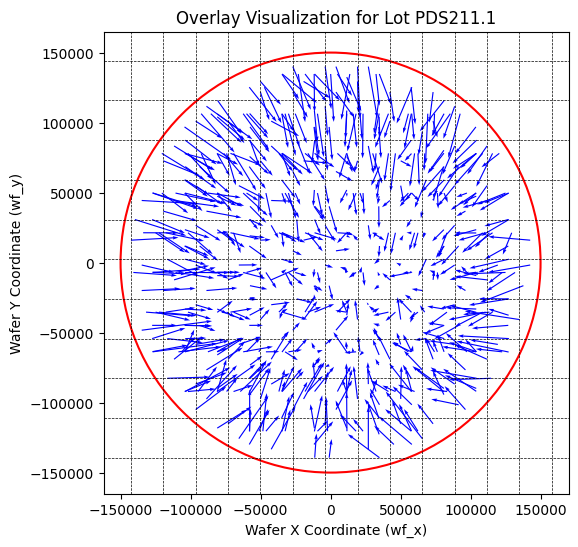

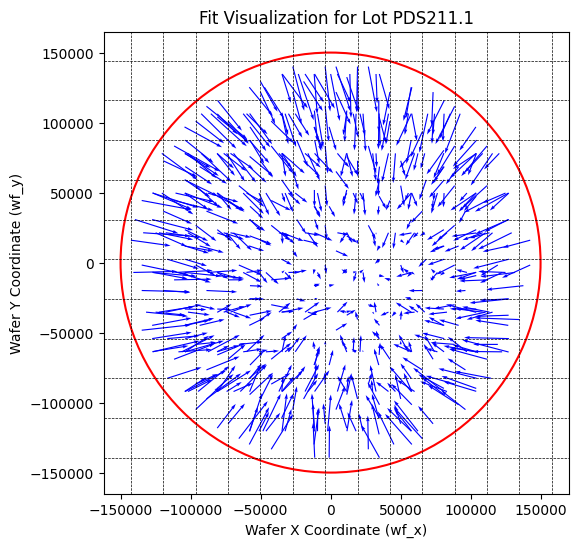

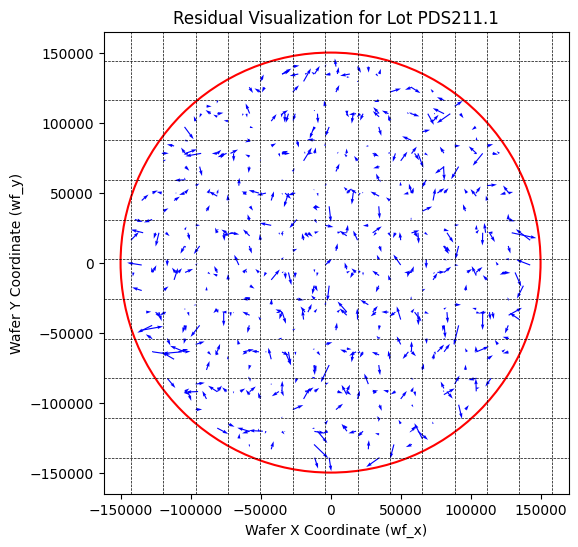

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# 엑셀 파일 읽기
file_path = 'C:/vscode/MODULE/output.xlsx'  # 실제 엑셀 파일 경로로 수정 필요
sheet_name = 'RawData-1'

df = pd.read_excel(file_path, sheet_name=sheet_name)

# 'lot_id'의 고유 값 리스트 추출
lot_ids = df['LOT_ID'].unique()

# 웨이퍼 경계 설정
wafer_radius = 150000

# 시각화 함수 수정 (step_pitch_x, step_pitch_y를 매개변수로 추가)
def plot_overlay(x, y, dx, dy, step_pitch_x, step_pitch_y, title='Wafer Vector Map', scale_factor=1e-7):
    plt.figure(figsize=(6, 6))

    # quiver 플롯 (overlay 값 화살표로 표시)
    plt.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=scale_factor, color='blue')

    # 수직선 추가 (step_pitch_x 기준)
    x_ticks = range(int(x.min()), int(x.max()) + int(step_pitch_x), int(step_pitch_x))
    for x_tick in x_ticks:
        # adjusted_x = x + map_shift_x  # step_pitch_x에 map_offset_x를 더한 값
        plt.axvline(x_tick, color='black', linestyle='--', linewidth=0.5)

    # 수평선 추가 (step_pitch_y 기준)
    y_ticks = range(int(y.min()), int(y.max()) + int(step_pitch_y), int(step_pitch_y))
    for y_tick in y_ticks:
        # adjusted_y = y + map_shift_y  # step_pitch_x에 map_offset_x를 더한 값
        plt.axhline(y_tick, color='black', linestyle='--', linewidth=0.5)

    # 웨이퍼 경계 원 추가
    wafer_circle = plt.Circle((0, 0), wafer_radius, color='red', fill=False, linestyle='-', linewidth=1.5)
    plt.gca().add_patch(wafer_circle)

    # 축 설정 및 제목 추가
    plt.axis('equal')
    plt.xlabel('Wafer X Coordinate (wf_x)')
    plt.ylabel('Wafer Y Coordinate (wf_y)')
    plt.title(title)
    plt.grid(False)
    
    # 그래프 출력
    plt.show()

# 각 lot_id별로 데이터 필터링 및 시각화
for lot_id in lot_ids:
    df_lot = df[df['LOT_ID'] == lot_id]
    
    # 데이터 열 추출
    wf_x = df_lot['wf_x']
    wf_y = df_lot['wf_y']
    overlay_x = df_lot['X_reg']
    overlay_y = df_lot['Y_reg']
    fit_x = df_lot['pred_x']
    fit_y = df_lot['pred_y']
    residual_x = df_lot['residual_x']
    residual_y = df_lot['residual_y']
    
    # STEP_PITCH_X, STEP_PITCH_Y 추출
    step_pitch_x = df_lot['STEP_PITCH_X'].iloc[0]
    step_pitch_y = df_lot['STEP_PITCH_Y'].iloc[0]
    map_shift_x = df_lot['MAP_SHIFT_X'].iloc[0]
    map_shift_y = df_lot['MAP_SHIFT_Y'].iloc[0]
    
    # 시각화 실행 (각 lot_id별로)
    plot_overlay(
        wf_x, wf_y, overlay_x, overlay_y, step_pitch_x, step_pitch_y,
        title=f'Overlay Visualization for Lot {lot_id}'
    )
    plot_overlay(
        wf_x, wf_y, fit_x, fit_y, step_pitch_x, step_pitch_y,
        title=f'Fit Visualization for Lot {lot_id}'
    )
    plot_overlay(
        wf_x, wf_y, residual_x, residual_y, step_pitch_x, step_pitch_y,
        title=f'Residual Visualization for Lot {lot_id}'
    )


